In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df_dem = pd.read_csv("~/data/connectivityml/unrestricted_pkalra_7_26_2021_17_39_25.csv") 

In [3]:
df_dem.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


In [4]:
print(df_dem.shape)
print(df_dem.columns.shape)

#1206 subjects
#582 demographics values

(1206, 582)
(582,)


In [5]:
#see all demographics and other items included in in demographics file
for col_name in df_dem.columns: 
    print(col_name)

Subject
Release
Acquisition
Gender
Age
3T_Full_MR_Compl
T1_Count
T2_Count
3T_RS-fMRI_Count
3T_RS-fMRI_PctCompl
3T_Full_Task_fMRI
3T_tMRI_PctCompl
fMRI_WM_PctCompl
fMRI_Gamb_PctCompl
fMRI_Mot_PctCompl
fMRI_Lang_PctCompl
fMRI_Soc_PctCompl
fMRI_Rel_PctCompl
fMRI_Emo_PctCompl
3T_dMRI_Compl
3T_dMRI_PctCompl
dMRI_3T_ReconVrs
fMRI_3T_ReconVrs
7T_Full_MR_Compl
7T_RS-fMRI_Count
7T_RS-fMRI_PctCompl
7T_Full_Task_fMRI
7T_tMRI_PctCompl
fMRI_Movie_Compl
fMRI_Movie_PctCompl
fMRI_Ret_Compl
fMRI_Ret_PctCompl
7T_dMRI_Compl
7T_dMRI_PctCompl
7T_fMRI_Mov_Vrs
MEG_AnyData
MEG_FullProt_Compl
MEG_HeadModel_Avail
MEG_CortRibn_Avail
MEG_Anatomy_Avail
MEG_Anatomy_Compl
MEG_Noise_Avail
MEG_Noise_Compl
MEG_RS_Avail
MEG_RS_Compl
MEG_WM_Avail
MEG_WM_Compl
MEG_StoryMath_Avail
MEG_StoryMath_Compl
MEG_Motor_Avail
MEG_Motor_Compl
Non-TB_Compl
VisProc_Compl
DelDisc_Compl
SCPT_Compl
IWRD_Compl
PMAT_Compl
VSPLOT_Compl
EmoRecog_Compl
NEO-FFI_Compl
ASR-Syn_Compl
ASR-DSM_Compl
Toolbox_Compl
MMSE_Compl
PSQI_Compl
Alert_Compl
AS

In [6]:
df_conn = pd.read_csv("~/data/connectivityml/HCP_PTN1200/netmats/3T_HCP1200_MSMAll_d100_ts2/netmats2.txt", sep=" ", header=None) 

In [7]:
df_conn.shape

#1003 subjects
#100x100 connectivity partial correlations

(1003, 10000)

In [8]:
df_id = pd.read_csv("~/data/connectivityml/HCP_PTN1200/subjectIDs.txt", sep=" ", header=None) 

In [9]:
df_id.shape

(1003, 1)

In [10]:
df_conn.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0.616760,9.5727,-5.4959,0.34639,3.0090,3.2134,1.1298,1.58890,-2.33410,...,1.185400,1.55440,1.369600,1.3055,2.8770,1.66720,0.14911,3.0171,0.26007,0
1,0,-0.296640,17.3170,-9.0467,-0.28723,1.3473,1.0459,1.7133,0.49141,-0.29712,...,0.038296,0.99805,0.618580,1.6566,2.5237,-0.40272,-0.38607,3.0958,1.29190,0
2,0,1.648600,6.6189,-8.8877,1.43370,1.0060,2.1167,2.4575,-0.11689,1.96460,...,-0.068334,0.83626,-0.004783,2.5012,8.2278,0.83097,-1.69360,2.8515,-2.08240,0
3,0,-0.902750,7.7215,-8.3907,3.31440,2.9395,3.4270,6.7093,1.36210,-2.66980,...,0.605570,0.98066,-0.791140,3.7111,4.3410,-0.29930,0.46776,2.4837,0.59513,0
4,0,-0.088768,9.4979,-10.4120,1.06460,4.3362,1.7206,4.5520,3.19110,-3.30900,...,1.709600,0.99331,0.326620,2.5242,4.2467,0.51453,-0.40380,1.2692,1.19840,0


In [11]:
df_id.rename(columns={ df_id.columns[0]: "Subject" },inplace = True)
df_id.head()

,Subject
0,100206
1,100307
2,100408
3,100610
4,101006


In [12]:
df_conn_id = pd.concat([df_id, df_conn], axis=1)
print(df_conn_id.shape)
df_conn_id.head()

(1003, 10001)


,Subject,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100206,0,0.616760,9.5727,-5.4959,0.34639,3.0090,3.2134,1.1298,1.58890,...,1.185400,1.55440,1.369600,1.3055,2.8770,1.66720,0.14911,3.0171,0.26007,0
1,100307,0,-0.296640,17.3170,-9.0467,-0.28723,1.3473,1.0459,1.7133,0.49141,...,0.038296,0.99805,0.618580,1.6566,2.5237,-0.40272,-0.38607,3.0958,1.29190,0
2,100408,0,1.648600,6.6189,-8.8877,1.43370,1.0060,2.1167,2.4575,-0.11689,...,-0.068334,0.83626,-0.004783,2.5012,8.2278,0.83097,-1.69360,2.8515,-2.08240,0
3,100610,0,-0.902750,7.7215,-8.3907,3.31440,2.9395,3.4270,6.7093,1.36210,...,0.605570,0.98066,-0.791140,3.7111,4.3410,-0.29930,0.46776,2.4837,0.59513,0
4,101006,0,-0.088768,9.4979,-10.4120,1.06460,4.3362,1.7206,4.5520,3.19110,...,1.709600,0.99331,0.326620,2.5242,4.2467,0.51453,-0.40380,1.2692,1.19840,0


In [13]:
df_dem_id= pd.merge_ordered(df_id, df_dem, left_by='Subject')
print(df_dem_id.shape)
df_dem_id.head()

(1003, 582)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80


In [37]:
#function to spit out x and y for ML models depending on what we want to predict
#filters out na values
def define_X_y(desired_y,dem_id=df_dem_id,conn_id=df_conn_id):
    X = conn_id[dem_id[desired_y].notnull()].drop(['Subject'], axis=1)
    temp_y = dem_id[dem_id[desired_y].notnull()]
    y = temp_y[desired_y]
    print(X.shape)
    print(temp_y.shape)
    print(y.shape)
    return X,y

In [38]:
X_mars,y_mars = define_X_y("Mars_Final")

(998, 10000)
(998, 582)
(998,)


In [16]:
# the linear_model modules contains many other linear estimators
from sklearn.linear_model import LinearRegression 

# initialize the estimator
model_mars = LinearRegression()

In [17]:
# Fit the model, passing in X and y
model_mars.fit(X_mars, y_mars)

LinearRegression()

In [18]:
y_pred = model_mars.predict(X_mars)

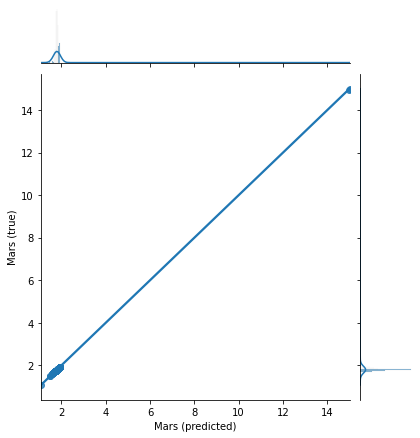

In [19]:
# We're using seaborn, a high-level plotting library that makes it
# extremely easy to generate complex, elegant visualizations.
g = sns.jointplot(x=y_pred, y=y_mars, kind="reg").set_axis_labels("Mars (predicted)", "Mars (true)")

In [20]:
# the metrics module contains predefined scoring functions
# for commonly used metrics like r^2, MSE, etc. but you
# can use any function you like as long as it has the
# signature used in the r2_score call below
from sklearn.metrics import r2_score

# Generate predicted values so we can compare them with
# the ground truth.
y_pred = model_mars.predict(X_mars)

# scoring functions are called by passing an array of
# true scores and and an array of predicted scores as
# inputs
r2_score(y_mars, y_pred)

1.0

In [21]:
model_mars.score(X_mars,y_mars)

1.0

In [22]:
from sklearn.model_selection import cross_val_score

r2_cv = cross_val_score(model_mars, X_mars, y_mars, cv=5)
print(r2_cv)

[-41.44016416 -36.77736124  -0.08584749  -0.07482295 -40.14937607]


In [27]:
X_gend,y_gend = define_X_y("Gender")

(1003, 582)
(1003,)
(1003, 10000)


In [41]:
# the linear_model modules contains many other linear estimators
from sklearn.linear_model import LogisticRegression 

# initialize the estimator
model_gend = LogisticRegression(max_iter=4000)

In [42]:
model_gend.fit(X_gend,y_gend)
model_gend.score(X_gend, y_gend)

1.0

In [44]:
r2_cv = cross_val_score(model_gend, X_gend, y_gend, cv=5)
print(r2_cv)

[0.97512438 0.95024876 0.96517413 0.97       0.985     ]
